In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import json
import time



In [110]:
df = pd.read_csv('output.csv')
df['is_win'] = df['is_win'].astype(int)

hero_id = pd.read_csv('hero_info.csv')

# grab data for win and loss
#df_win = df[df['is_win'] == 1]
#df_lose = df[df['is_win'] == 0]
df.head()

,match_uid,player_uid,name,hero_id,is_win,kills,deaths,assists,hero_damage,hero_healed,damage_taken,heroes
0,6714034_1739047847_94_11001_10,1760979252,Boogerscrotum,1050,0,2,4,3,1434.000000,6792.121636,5171.407166,"[{'hero_id': 1050, 'playtime': {'minutes': 7, ..."
1,6714034_1739047847_94_11001_10,2060844458,SpiderManBulge,1023,0,3,8,3,6320.204075,2842.749824,11076.655098,"[{'hero_id': 1040, 'playtime': {'seconds': 0, ..."
2,6714034_1739047847_94_11001_10,946297425,WoozyMckay,1041,0,5,6,5,7897.712778,6203.631268,3900.479958,"[{'hero_id': 1031, 'playtime': {'minutes': 2, ..."
3,6714034_1739047847_94_11001_10,294125044,Portal112,1029,0,10,8,0,5170.035370,0.000000,4896.128411,"[{'hero_id': 1029, 'playtime': {'minutes': 7, ..."
4,6714034_1739047847_94_11001_10,1816976623,DraconianSpy,1018,0,4,6,0,6029.966664,0.000000,19273.281858,"[{'hero_id': 1011, 'playtime': {'minutes': 5, ..."


In [66]:
params = ['id', 'name', 'attack_type', 'role']
hero_info_df = hero_id[params]
hero_info_df.head()


,id,name,attack_type,role
0,1011,Bruce Banner,Melee Heroes,VANGUARD
1,1014,The Punisher,Hitscan Heroes,DUELIST
2,1015,Storm,Projectile Heroes,DUELIST
3,1016,Loki,Projectile Heroes,STRATEGIST
4,1018,Doctor Strange,Projectile Heroes,VANGUARD


***
## Purpose

The goal of this file is to perform the same analysis as the first file but classify the data further into their respective roles.


In [62]:
import ast


data_unpacked = pd.DataFrame()

player_heros = df[['match_uid','player_uid','heroes']]

for row_num, data in enumerate(player_heros['heroes']):
    # Parse the string using ast.literal_eval
    row_data = ast.literal_eval(data)

    # Create a DataFrame from the list of dictionaries
    row_df = pd.DataFrame(row_data)

    data_unpacked = pd.concat([data_unpacked, row_df], ignore_index=True)

display(data_unpacked)

,hero_id,playtime,kills,deaths,assists,hit_rate
0,1050,"{'minutes': 7, 'seconds': 39, 'raw': 459}",2,4,3,0.547771
1,1040,"{'seconds': 0, 'raw': 0}",0,0,0,0.000000
2,1039,"{'minutes': 2, 'seconds': 33, 'raw': 153}",0,3,1,0.475000
3,1041,"{'minutes': 1, 'seconds': 42, 'raw': 102}",3,2,0,0.540541
4,1023,"{'minutes': 3, 'seconds': 35, 'raw': 215}",0,3,2,0.325648
...,...,...,...,...,...,...
452,1025,"{'minutes': 3, 'seconds': 44, 'raw': 224}",2,4,1,0.927536
453,1031,"{'minutes': 12, 'seconds': 23, 'raw': 743}",19,9,8,0.492338
454,1038,"{'minutes': 3, 'seconds': 33, 'raw': 213}",4,3,0,0.512048
455,1047,"{'minutes': 12, 'seconds': 12, 'raw': 732}",3,6,28,0.641026


In [102]:
# Initialize an empty DataFrame to store the expanded data
expanded_data = pd.DataFrame()

# Iterate through each row in the player_heros DataFrame
for index, row in player_heros.iterrows():
    # Parse the heroes column
    heroes_list = ast.literal_eval(row['heroes'])
    
    # Create a DataFrame from the heroes list
    heroes_df = pd.DataFrame(heroes_list)
    
    # Add the player_uid and match_uid to the heroes DataFrame
    heroes_df['player_uid'] = row['player_uid']
    heroes_df['match_uid'] = row['match_uid']
    
    # Append the heroes DataFrame to the expanded_data DataFrame
    expanded_data = pd.concat([expanded_data, heroes_df], ignore_index=True)

# Display the expanded DataFrame
display(expanded_data)

,hero_id,playtime,kills,deaths,assists,hit_rate,player_uid,match_uid
0,1050,"{'minutes': 7, 'seconds': 39, 'raw': 459}",2,4,3,0.547771,1760979252,6714034_1739047847_94_11001_10
1,1040,"{'seconds': 0, 'raw': 0}",0,0,0,0.000000,2060844458,6714034_1739047847_94_11001_10
2,1039,"{'minutes': 2, 'seconds': 33, 'raw': 153}",0,3,1,0.475000,2060844458,6714034_1739047847_94_11001_10
3,1041,"{'minutes': 1, 'seconds': 42, 'raw': 102}",3,2,0,0.540541,2060844458,6714034_1739047847_94_11001_10
4,1023,"{'minutes': 3, 'seconds': 35, 'raw': 215}",0,3,2,0.325648,2060844458,6714034_1739047847_94_11001_10
...,...,...,...,...,...,...,...,...
452,1025,"{'minutes': 3, 'seconds': 44, 'raw': 224}",2,4,1,0.927536,746204661,6714077_1737075380_398_11001_10
453,1031,"{'minutes': 12, 'seconds': 23, 'raw': 743}",19,9,8,0.492338,525413401,6714077_1737075380_398_11001_10
454,1038,"{'minutes': 3, 'seconds': 33, 'raw': 213}",4,3,0,0.512048,525413401,6714077_1737075380_398_11001_10
455,1047,"{'minutes': 12, 'seconds': 12, 'raw': 732}",3,6,28,0.641026,1702045875,6714077_1737075380_398_11001_10


Now lets attach the hero names on top of the data

In [ ]:
# ADD NAN values to map from the other data frame
# this process is a major pain ngl 

#expanded_data['name'] = np.nan
#expanded_data['role'] = np.nan
#expanded_data['hero_damage'] = np.nan
#expanded_data['hero_healed'] = np.nan
#expanded_data['damage_taken'] = np.nan
#expanded_data['is_win'] = np.nan

In [104]:
# Map the data from hero info to the expanded data
expanded_data['name'] = expanded_data['name'].fillna(expanded_data['hero_id'].map(hero_info_df.set_index('id')['name']))
expanded_data['role'] = expanded_data['role'].fillna(expanded_data['hero_id'].map(hero_info_df.set_index('id')['role']))


expanded_data

,hero_id,playtime,kills,deaths,assists,hit_rate,player_uid,match_uid,name,role
0,1050,"{'minutes': 7, 'seconds': 39, 'raw': 459}",2,4,3,0.547771,1760979252,6714034_1739047847_94_11001_10,Invisible Woman,STRATEGIST
1,1040,"{'seconds': 0, 'raw': 0}",0,0,0,0.000000,2060844458,6714034_1739047847_94_11001_10,Mister Fantastic,DUELIST
2,1039,"{'minutes': 2, 'seconds': 33, 'raw': 153}",0,3,1,0.475000,2060844458,6714034_1739047847_94_11001_10,Thor,VANGUARD
3,1041,"{'minutes': 1, 'seconds': 42, 'raw': 102}",3,2,0,0.540541,2060844458,6714034_1739047847_94_11001_10,Winter Soldier,DUELIST
4,1023,"{'minutes': 3, 'seconds': 35, 'raw': 215}",0,3,2,0.325648,2060844458,6714034_1739047847_94_11001_10,Rocket Raccoon,STRATEGIST
...,...,...,...,...,...,...,...,...,...,...
452,1025,"{'minutes': 3, 'seconds': 44, 'raw': 224}",2,4,1,0.927536,746204661,6714077_1737075380_398_11001_10,Cloak & Dagger,STRATEGIST
453,1031,"{'minutes': 12, 'seconds': 23, 'raw': 743}",19,9,8,0.492338,525413401,6714077_1737075380_398_11001_10,Luna Snow,STRATEGIST
454,1038,"{'minutes': 3, 'seconds': 33, 'raw': 213}",4,3,0,0.512048,525413401,6714077_1737075380_398_11001_10,Scarlet Witch,DUELIST
455,1047,"{'minutes': 12, 'seconds': 12, 'raw': 732}",3,6,28,0.641026,1702045875,6714077_1737075380_398_11001_10,Jeff The Land Shark,STRATEGIST


In [ ]:
# Extract 'raw' from the 'playtime' column and set it as the new value for 'playtime'
#expanded_data['playtime'] = expanded_data['playtime'].apply(lambda x: x['raw'])

# Display the updated DataFrame
display(expanded_data)

,hero_id,playtime,kills,deaths,assists,hit_rate,player_uid,match_uid,name,role
0,1050,459,2,4,3,0.547771,1760979252,6714034_1739047847_94_11001_10,Invisible Woman,STRATEGIST
1,1040,0,0,0,0,0.000000,2060844458,6714034_1739047847_94_11001_10,Mister Fantastic,DUELIST
2,1039,153,0,3,1,0.475000,2060844458,6714034_1739047847_94_11001_10,Thor,VANGUARD
3,1041,102,3,2,0,0.540541,2060844458,6714034_1739047847_94_11001_10,Winter Soldier,DUELIST
4,1023,215,0,3,2,0.325648,2060844458,6714034_1739047847_94_11001_10,Rocket Raccoon,STRATEGIST
...,...,...,...,...,...,...,...,...,...,...
452,1025,224,2,4,1,0.927536,746204661,6714077_1737075380_398_11001_10,Cloak & Dagger,STRATEGIST
453,1031,743,19,9,8,0.492338,525413401,6714077_1737075380_398_11001_10,Luna Snow,STRATEGIST
454,1038,213,4,3,0,0.512048,525413401,6714077_1737075380_398_11001_10,Scarlet Witch,DUELIST
455,1047,732,3,6,28,0.641026,1702045875,6714077_1737075380_398_11001_10,Jeff The Land Shark,STRATEGIST


## **Womp womp**

So i've determined--while this is cool and all--it's really impractical to combine it back to the original table. 

Instead lets just use the single hero id on the original table, still decompile the playtime and assign roles

In [167]:
# Map the data from hero info to the expanded data
#expanded_data['name'] = expanded_data['name'].fillna(expanded_data['hero_id'].map(hero_info_df.set_index('id')['name']))
#expanded_data['role'] = expanded_data['role'].fillna(expanded_data['hero_id'].map(hero_info_df.set_index('id')['role']))

df['hero_name'] = np.nan
df['role'] = np.nan

df['hero_name'] = df['hero_name'].fillna(df['hero_id'].map(hero_info_df.set_index('id')['name']))
df['role'] = df['role'].fillna(df['hero_id'].map(hero_info_df.set_index('id')['role']))

df_win = df[df['is_win'] == 1]
df_lose = df[df['is_win'] == 0]

df_van = df[df['role'] == 'VANGUARD']
df_supp = df[df['role'] == 'STRATEGIST']
df_dps = df[df['role'] == 'DUELIST']

df_van_w = df_van[df_van['is_win'] == 1]
df_van_l = df_van[df_van['is_win'] == 0]

df_supp_w = df_supp[df_supp['is_win'] == 1]
df_supp_l = df_supp[df_supp['is_win'] == 0]

df_dps_w = df_dps[df_dps['is_win'] == 1]
df_dps_l = df_dps[df_dps['is_win'] == 0]

***
## Analysis by Role Grouping

Lets see how the impact of each parameter changes when we group them by role.


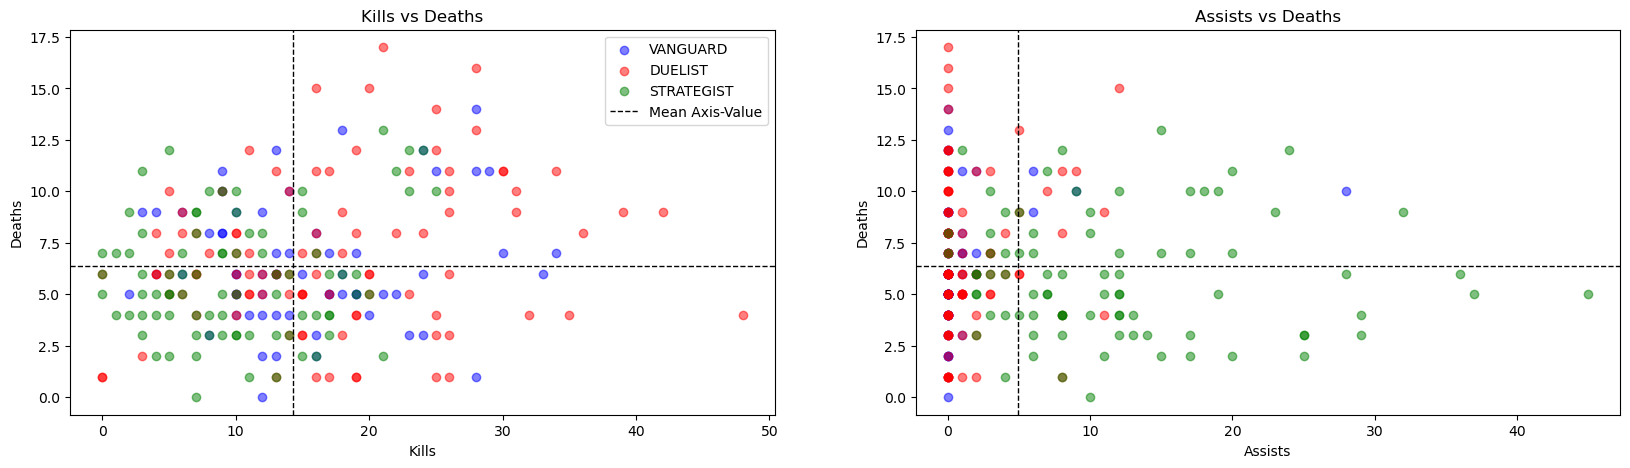

In [123]:
# check kills vs deaths against win/loss
mean_kills = df['kills'].mean()
mean_deaths = df['deaths'].mean()
mean_assists = df['assists'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(data=df_van, x='kills', y='deaths', alpha=0.5, c='blue')
axs[0].scatter(data=df_dps, x='kills', y='deaths', alpha=0.5, c='red')
axs[0].scatter(data=df_supp, x='kills', y='deaths', alpha=0.5, c='green')
axs[0].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[0].axvline(mean_kills, color='black', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('Kills')
axs[0].set_ylabel('Deaths')
axs[0].set_title('Kills vs Deaths')
axs[0].legend(['VANGUARD', 'DUELIST' , 'STRATEGIST', 'Mean Axis-Value'])

axs[1].scatter(data=df_van, x='assists', y='deaths', alpha=0.5, c='blue')
axs[1].scatter(data=df_dps, x='assists', y='deaths', alpha=0.5, c='red')
axs[1].scatter(data=df_supp, x='assists', y='deaths', alpha=0.5, c='green')
axs[1].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[1].axvline(mean_assists, color='black', linestyle='dashed', linewidth=1)
axs[1].set_xlabel('Assists')
axs[1].set_ylabel('Deaths')
axs[1].set_title('Assists vs Deaths')


plt.show()

Text(0.5, 1.0, 'Assists vs Deaths (VANGUARD)')

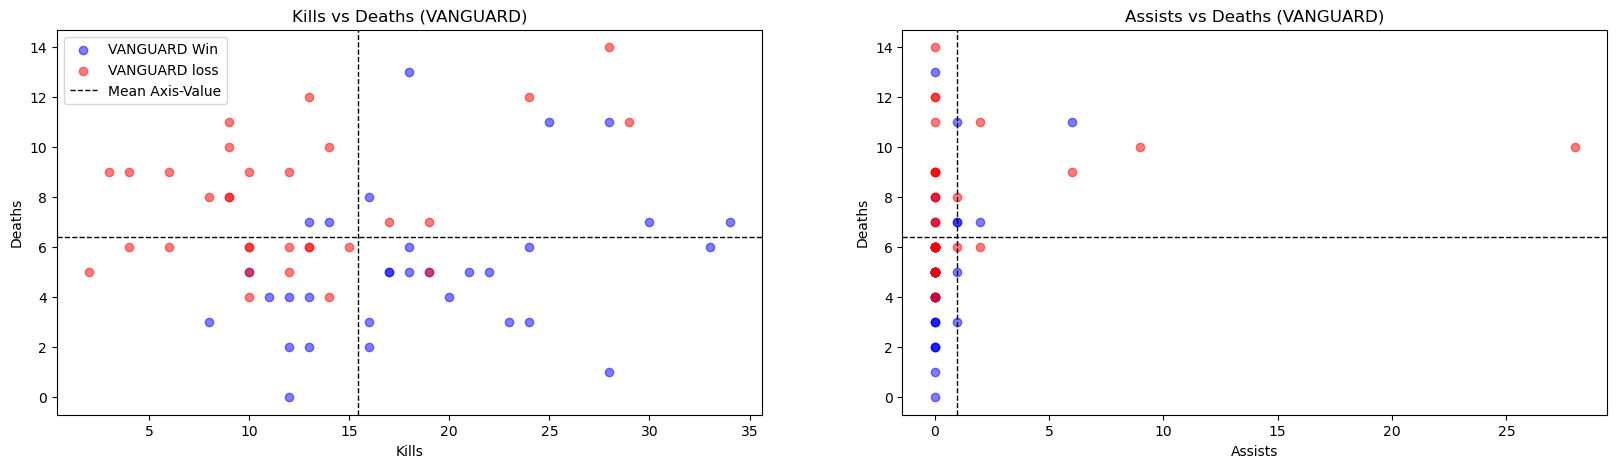

In [171]:
# check kills vs deaths against win/loss
mean_kills = df_van['kills'].mean()
mean_deaths = df_van['deaths'].mean()
mean_assists = df_van['assists'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(data=df_van_w, x='kills', y='deaths', alpha=0.5, c='blue')
axs[0].scatter(data=df_van_l, x='kills', y='deaths', alpha=0.5, c='red')
axs[0].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[0].axvline(mean_kills, color='black', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('Kills')
axs[0].set_ylabel('Deaths')
axs[0].set_title('Kills vs Deaths (VANGUARD)')
axs[0].legend(['VANGUARD Win', 'VANGUARD loss' , 'Mean Axis-Value'])

axs[1].scatter(data=df_van_w, x='assists', y='deaths', alpha=0.5, c='blue')
axs[1].scatter(data=df_van_l, x='assists', y='deaths', alpha=0.5, c='red')
axs[1].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[1].axvline(mean_assists, color='black', linestyle='dashed', linewidth=1)
axs[1].set_xlabel('Assists')
axs[1].set_ylabel('Deaths')
axs[1].set_title('Assists vs Deaths (VANGUARD)')

Text(0.5, 1.0, 'Assists vs Deaths (DUELIST)')

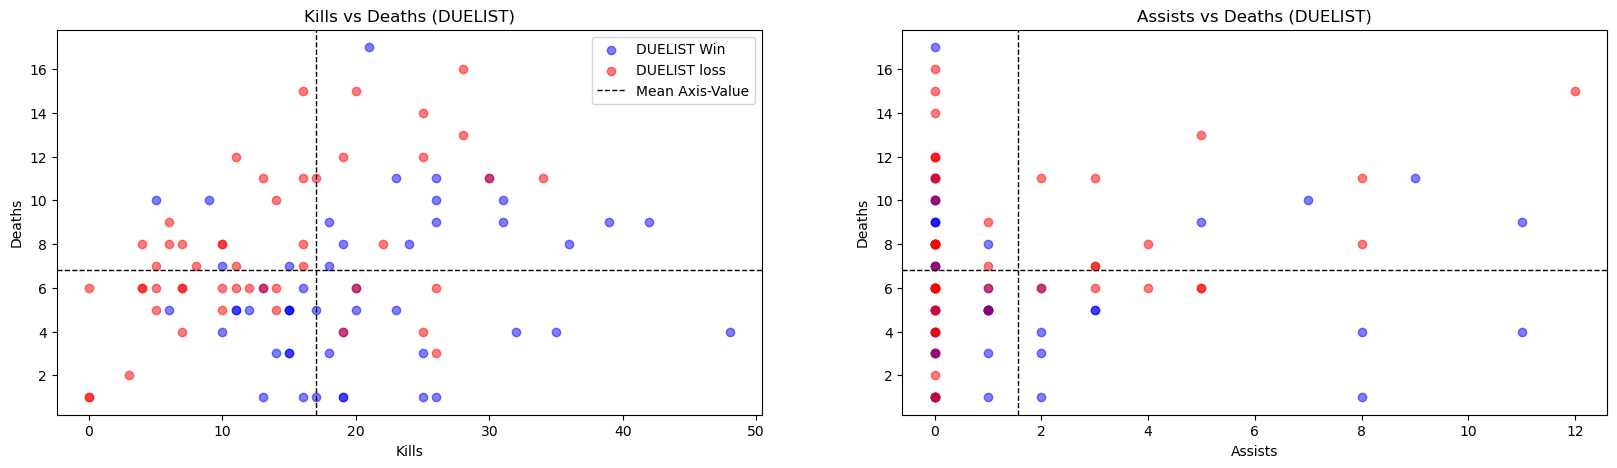

In [172]:
# check kills vs deaths against win/loss
mean_kills = df_dps['kills'].mean()
mean_deaths = df_dps['deaths'].mean()
mean_assists = df_dps['assists'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(data=df_dps_w, x='kills', y='deaths', alpha=0.5, c='blue')
axs[0].scatter(data=df_dps_l, x='kills', y='deaths', alpha=0.5, c='red')
axs[0].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[0].axvline(mean_kills, color='black', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('Kills')
axs[0].set_ylabel('Deaths')
axs[0].set_title('Kills vs Deaths (DUELIST)')
axs[0].legend(['DUELIST Win', 'DUELIST loss' , 'Mean Axis-Value'])

axs[1].scatter(data=df_dps_w, x='assists', y='deaths', alpha=0.5, c='blue')
axs[1].scatter(data=df_dps_l, x='assists', y='deaths', alpha=0.5, c='red')
axs[1].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[1].axvline(mean_assists, color='black', linestyle='dashed', linewidth=1)
axs[1].set_xlabel('Assists')
axs[1].set_ylabel('Deaths')
axs[1].set_title('Assists vs Deaths (DUELIST)')

Text(0.5, 1.0, 'Assists vs Deaths (STRATEGIST)')

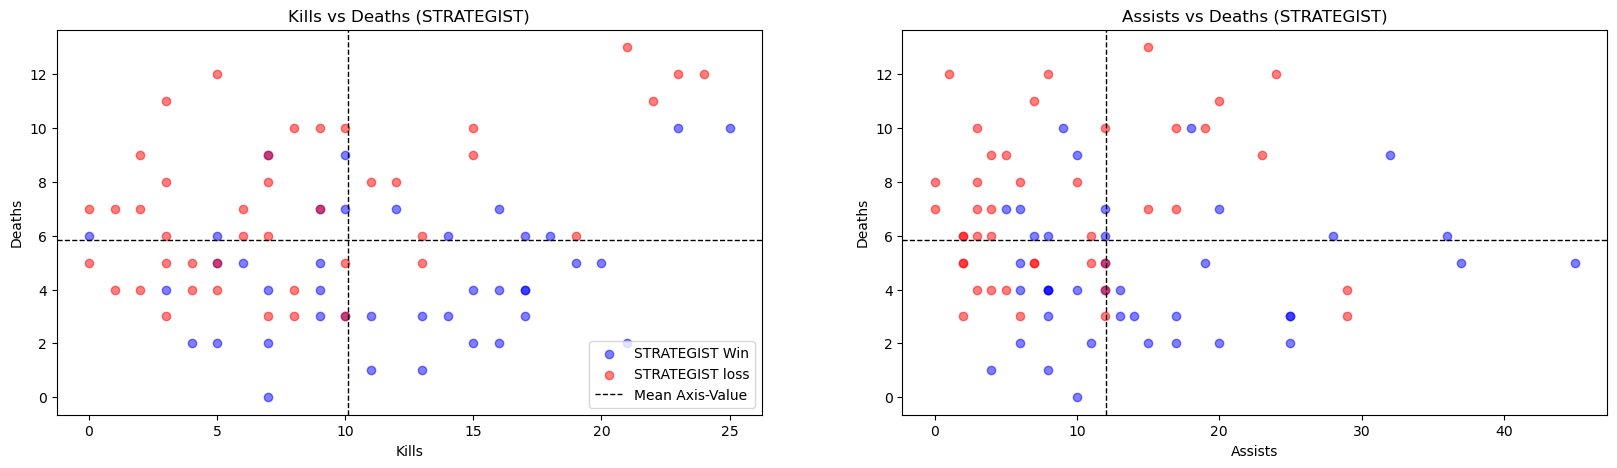

In [173]:
# check kills vs deaths against win/loss
mean_kills = df_supp['kills'].mean()
mean_deaths = df_supp['deaths'].mean()
mean_assists = df_supp['assists'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(data=df_supp_w, x='kills', y='deaths', alpha=0.5, c='blue')
axs[0].scatter(data=df_supp_l, x='kills', y='deaths', alpha=0.5, c='red')
axs[0].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[0].axvline(mean_kills, color='black', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('Kills')
axs[0].set_ylabel('Deaths')
axs[0].set_title('Kills vs Deaths (STRATEGIST)')
axs[0].legend(['STRATEGIST Win', 'STRATEGIST loss' , 'Mean Axis-Value'])

axs[1].scatter(data=df_supp_w, x='assists', y='deaths', alpha=0.5, c='blue')
axs[1].scatter(data=df_supp_l, x='assists', y='deaths', alpha=0.5, c='red')
axs[1].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[1].axvline(mean_assists, color='black', linestyle='dashed', linewidth=1)
axs[1].set_xlabel('Assists')
axs[1].set_ylabel('Deaths')
axs[1].set_title('Assists vs Deaths (STRATEGIST)')

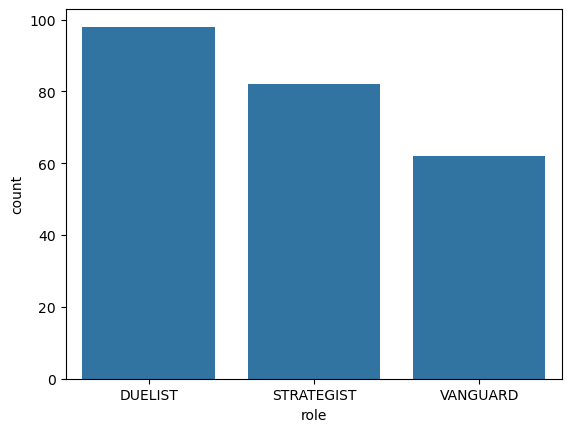

In [166]:
# lets look at hero playrate and role rate
sns.countplot(x = 'role',
              data = df,
              order = df['role'].value_counts().index)
plt.show()

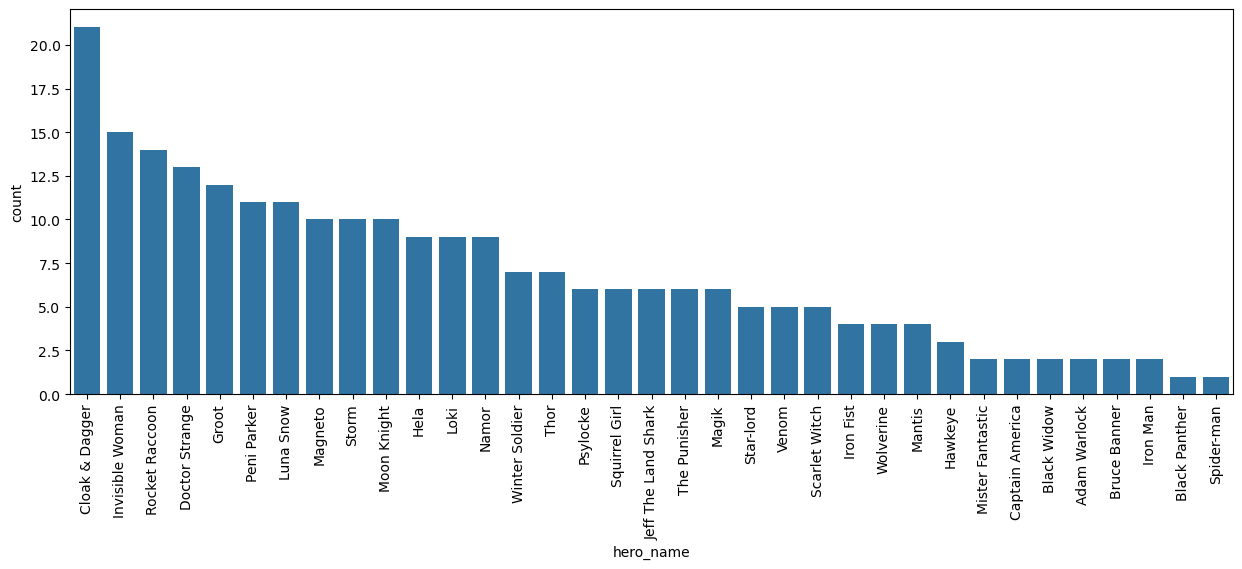

In [ ]:
plt.figure(figsize=[15,5])

sns.countplot(x = 'hero_name',
              data = df,
              order = df['hero_name'].value_counts().index)
plt.xticks(rotation=90)
plt.show()
#sns.histplot(data=df['hero_name'])


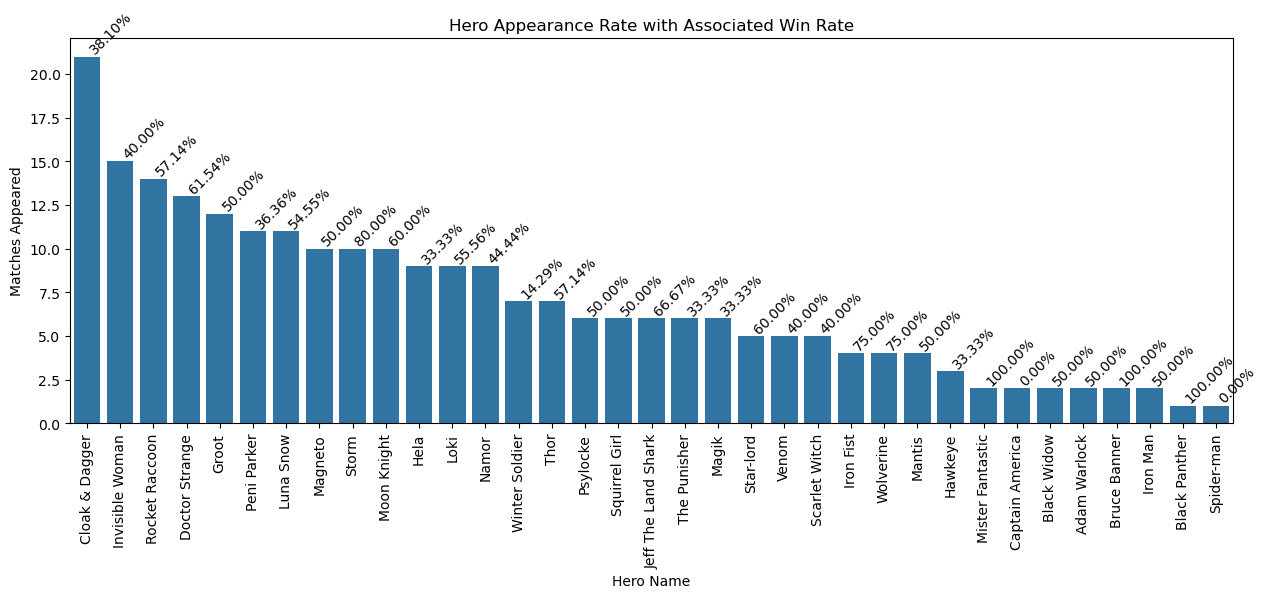

In [165]:
# Group by hero_id and calculate the win rate
winrate_df = df.groupby('hero_name').agg(
    matches_played=('hero_id', 'count'),
    matches_won=('is_win', 'sum')
).reset_index()

# Calculate win rate
winrate_df['win_rate'] = winrate_df['matches_won'] / winrate_df['matches_played']

# Display the win rate DataFrame
# display(winrate_df)
# Plot the win rate on top of each bar in the seaborn countplot
plt.figure(figsize=[15,5])
ax = sns.countplot(x='hero_name', data=df, order=df['hero_name'].value_counts().index)
plt.xlabel('Hero Name')
plt.ylabel('Matches Appeared')
plt.title('Hero Appearance Rate with Associated Win Rate')
plt.xticks(rotation=90)

# Add win rate text on top of each bar
for p in ax.patches:
    hero_name = p.get_x() + p.get_width() / 2
    hero_name_str = ax.get_xticklabels()[int(hero_name)].get_text()
    if hero_name_str in winrate_df['hero_name'].values:
        win_rate = winrate_df[winrate_df['hero_name'] == hero_name_str].win_rate.values[0]
        ax.annotate(f'{win_rate:.2%}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='left', 
                va='bottom', 
                rotation=45)
plt.show()